In [6]:
import os
import sys
import simpful as fs  # changed line 149 to show(block=False) (in simpful.py)
from matplotlib import pylab as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Store the console output device, used to mute print() statements
old_stdout = sys.stdout


sys.stdout = open(os.devnull, "w")  # Mute console from this point
FS = fs.FuzzySystem()
sys.stdout = old_stdout  # Unmute the console


def surface_plot_3d(sys, ling_vars=[], domain=None, divisions=20, sugeno=False):
    # TODO Make function to make figure of linguistic variables
    # Plotting surface
    if domain is None:
        domain = [[0, 1], [0, 1], [0, 1]]
    xs = []
    ys = []
    zs = []
    DIVs = divisions
    for x in np.linspace(domain[0][0], domain[0][1], DIVs):
        for y in np.linspace(domain[1][0], domain[1][1], DIVs):
            sys.set_variable(ling_vars[0], x)
            sys.set_variable(ling_vars[1], y)
            if sugeno:
                z = sys.Sugeno_inference([ling_vars[2]])
            else:
                z = sys.Mamdani_inference([ling_vars[2]])
            xs.append(x)
            ys.append(y)
            zs.append(z[list(z.keys())[0]])

        # Print progress bar
        percent = ("{0:." + str(1) + "f}").format(100 * (x / float(domain[0][1]-domain[0][0])))
        filledLength = int(100 * x // domain[0][1]-domain[0][0])
        bar = '█' * filledLength + '-' * (100 - filledLength)
        print(f'\r{"Generating plot"} |{bar}| {percent}% {"generated"}', end="\r")
    print()
    xs = np.array(xs)
    ys = np.array(ys)
    zs = np.array(zs)

    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    xx, yy = plt.meshgrid(xs, ys)

    ax.plot_trisurf(xs, ys, zs, vmin=0, vmax=25, cmap='gnuplot2')
    ax.set_xlabel(ling_vars[0])
    ax.set_ylabel(ling_vars[1])
    ax.set_zlabel(ling_vars[2])
    ax.set_title("Simpful", pad=20)
    ax.set_zlim(domain[2][0], domain[2][1])
    plt.tight_layout()
    plt.show(block=False)


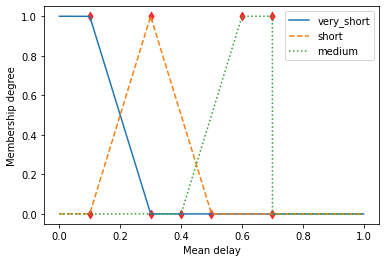

In [7]:
# Linguistic variables
# TODO Refactor, smarter way to add sets?
# Mean delay [m]
mean_delay_m1 = fs.FuzzySet(points=[[0.1, 1.],  [0.3, 0.]], term="very_short")
mean_delay_m2 = fs.FuzzySet(points=[[0.1, 0.],  [0.3, 1.], [0.5, 0.]], term="short")
mean_delay_m3 = fs.FuzzySet(points=[[0.4, 0.],  [0.6, 1], [0.7, 1], [0.7, 0.]], term="medium")
mean_delay = fs.LinguisticVariable([mean_delay_m1, mean_delay_m2, mean_delay_m3], universe_of_discourse=[0, 1],
                                   concept="Mean delay")
# Add the linguistic variable to the system
FS.add_linguistic_variable("mean_delay", mean_delay)

# Plot the variable
FS.plot_variable("mean_delay")

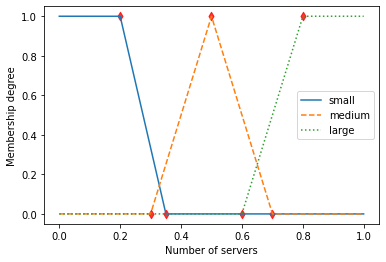

In [8]:
# Number of servers [s]
# TODO check numbers
num_of_servers_s1 = fs.FuzzySet(points=[[0.2, 1.], [0.35, 0.]], term="small")
num_of_servers_s2 = fs.FuzzySet(points=[[0.3, 0.], [0.5, 1.], [0.7, 0]], term="medium")
num_of_servers_s3 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.]], term="large")
num_of_servers = fs.LinguisticVariable([num_of_servers_s1, num_of_servers_s2, num_of_servers_s3],
                                       universe_of_discourse=[0, 1], concept="Number of servers")
# Add the linguistic variable to the system
FS.add_linguistic_variable("num_of_servers", num_of_servers)
# Plot the variable
FS.plot_variable("num_of_servers")


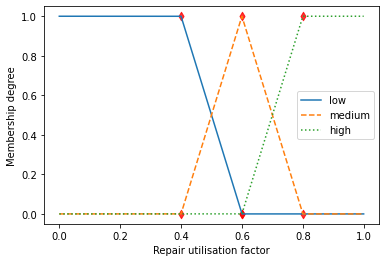

In [9]:
# Repair utilisation factor [rho]
# TODO check numbers
repair_util_rho1 = fs.FuzzySet(points=[[0.4, 1.], [0.6, 0.]], term="low")
repair_util_rho2 = fs.FuzzySet(points=[[0.4, 0.], [0.6, 1.], [0.8, 0]], term="medium")
repair_util_rho3 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.]], term="high")
repair_util = fs.LinguisticVariable([repair_util_rho1, repair_util_rho2, repair_util_rho3],
                                    universe_of_discourse=[0, 1], concept="Repair utilisation factor")
# Add the linguistic variable to the system
FS.add_linguistic_variable("repair_util", repair_util)
# Plot the variable
FS.plot_variable("repair_util")

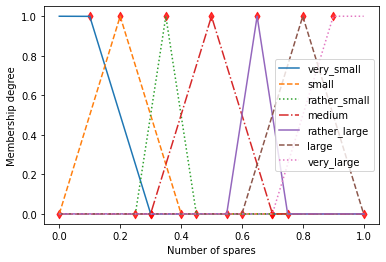

In [10]:
# Number of spares [n]
# TODO check numbers
num_of_spares_n1 = fs.FuzzySet(points=[[0.1, 1.], [0.3, 0.]], term="very_small")
num_of_spares_n2 = fs.FuzzySet(points=[[0., 0.], [0.2, 1.], [0.4, 0.]], term="small")
num_of_spares_n3 = fs.FuzzySet(points=[[0.25, 0.], [0.35, 1.], [0.45, 0.]], term="rather_small")
num_of_spares_n4 = fs.FuzzySet(points=[[0.3, 0.], [0.5, 1.], [0.7, 0.]], term="medium")
num_of_spares_n5 = fs.FuzzySet(points=[[0.55, 0.], [0.65, 1.], [0.75, 0.]], term="rather_large")
num_of_spares_n6 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.], [1., 0.]], term="large")
num_of_spares_n7 = fs.FuzzySet(points=[[0.7, 0.], [0.9, 1.]], term="very_large")
num_of_spares = fs.LinguisticVariable([num_of_spares_n1, num_of_spares_n2, num_of_spares_n3, num_of_spares_n4,
                                       num_of_spares_n5, num_of_spares_n6, num_of_spares_n7],
                                      universe_of_discourse=[0, 1], concept="Number of spares")
# Add the linguistic variable to the system
FS.add_linguistic_variable("num_of_spares", num_of_spares)
# Plot the variable
FS.plot_variable("num_of_spares")


In [11]:
# TODO check variable names and format
R1 = "IF (repair_util IS low) THEN (num_of_spares IS small)"
R2 = "IF (repair_util IS medium) THEN (num_of_spares IS medium)"
R3 = "IF (repair_util IS high) THEN (num_of_spares IS large)"
R4 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) THEN (num_of_spares IS very_large)"
R5 = "IF (mean_delay IS short) AND (num_of_servers IS small) THEN (num_of_spares IS large)"
R6 = "IF (mean_delay IS medium) AND (num_of_servers IS small) THEN (num_of_spares IS medium)"
R7 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) THEN (num_of_spares IS rather_large)"
R8 = "IF (mean_delay IS short) AND (num_of_servers IS medium) THEN (num_of_spares IS rather_small)"
R9 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) THEN (num_of_spares IS small)"
R10 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) THEN (num_of_spares IS medium)"
R11 = "IF (mean_delay IS short) AND (num_of_servers IS large) THEN (num_of_spares IS small)"
R12 = "IF (mean_delay IS medium) AND (num_of_servers IS large) THEN (num_of_spares IS very_small)"

# Add the rules to the system
FS.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12])

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


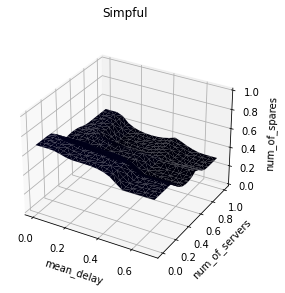

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


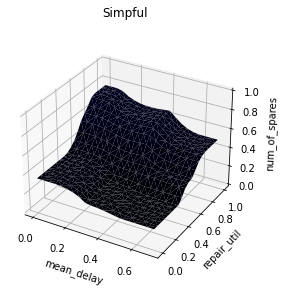

In [12]:
# Plot the response for the rules, surface plot
FS.set_variable("repair_util", 0.6)
surface_plot_3d(FS, ["mean_delay", "num_of_servers", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, 1]], divisions=20)
FS.set_variable("num_of_servers", 0.5)
surface_plot_3d(FS, ["mean_delay", "repair_util", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, 1]], divisions=20)

 * Detected Sugeno model type
Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


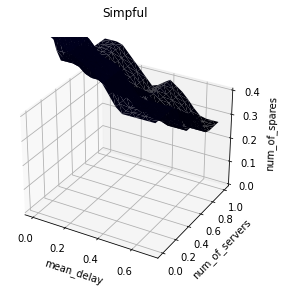

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


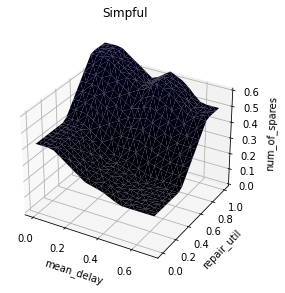

In [13]:
# Add sugeno method, and plot surface plot
sys.stdout = open(os.devnull, "w")  # Mute console from this point
FS_sugeno_rb1 = fs.FuzzySystem()
sys.stdout = old_stdout  # Unmute the console

FS_sugeno_rb1.add_linguistic_variable("mean_delay", mean_delay)
FS_sugeno_rb1.add_linguistic_variable("num_of_servers", num_of_servers)
FS_sugeno_rb1.add_linguistic_variable("repair_util", repair_util)

FS_sugeno_rb1.add_rules([R1, R2, R3, R4, R5, R6, R7, R8, R9, R10, R11, R12])

# Define output crisp values
FS_sugeno_rb1.set_crisp_output_value("very_small", 0.05)
FS_sugeno_rb1.set_crisp_output_value("small", 0.2)
FS_sugeno_rb1.set_crisp_output_value("rather_small", 0.35)
FS_sugeno_rb1.set_crisp_output_value("medium", 0.5)
FS_sugeno_rb1.set_crisp_output_value("rather_large", 0.65)
FS_sugeno_rb1.set_crisp_output_value("large", 0.8)
FS_sugeno_rb1.set_crisp_output_value("very_large", 0.95)


# Plot the response for the rules, surface plot (sugeno)
FS_sugeno_rb1.set_variable("repair_util", 0.6)
surface_plot_3d(FS_sugeno_rb1, ["mean_delay", "num_of_servers", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, .4]],
                divisions=20, sugeno=True)
FS_sugeno_rb1.set_variable("num_of_servers", 0.5)
surface_plot_3d(FS_sugeno_rb1, ["mean_delay", "repair_util", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, .6]],
                divisions=20, sugeno=True)

# Add testing and give a response
# Make it possible to have sliders to change variables and get the crisp output...

# Add testing and compare to the other method...

In [14]:
# Define the rules for db2
# mean_delay: very_short, short, medium
# number_of_servers: small, medium, large
# utilisation_factor: low, medium, high
# number_of_spares: very_small, small, rather_small, medium, rather_large, large, very_large
#Rule Base 2
R1_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R2_db2 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R3_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R4_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R5_db2 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R6_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R7_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS low) " \
         "THEN (num_of_spares IS small)"
R8_db2 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS low) " \
         "THEN (num_of_spares IS small)"
R9_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R10_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R11_db2 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R12_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R13_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R14_db2 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R15_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R16_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS medium)"
R17_db2 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R18_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R19_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS very_large)"
R20_db2 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS large)"
R21_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R22_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R23_db2 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R24_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS small)"
R25_db2 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_large)"
R26_db2 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R27_db2 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_small)"

rule_base2 = [R1_db2, R2_db2, R3_db2, R4_db2, R5_db2, R6_db2, R7_db2, R8_db2, R9_db2, R10_db2, R11_db2, R12_db2,
              R13_db2, R14_db2, R15_db2, R16_db2, R17_db2, R18_db2, R19_db2, R20_db2, R21_db2, R22_db2, R23_db2,
              R24_db2, R25_db2, R26_db2, R27_db2]

In [15]:
sys.stdout = open(os.devnull, "w")  # Mute console from this point
FS_mamdani_rb2 = fs.FuzzySystem()
FS_sugeno_rb2 = fs.FuzzySystem()
sys.stdout = old_stdout  # Unmute the console

# Add the linguistic variables to the system, uses the same definitions as the rule-base 1 system
FS_mamdani_rb2.add_linguistic_variable("mean_delay", mean_delay)
FS_mamdani_rb2.add_linguistic_variable("num_of_servers", num_of_servers)
FS_mamdani_rb2.add_linguistic_variable("repair_util", repair_util)
FS_mamdani_rb2.add_linguistic_variable("num_of_spares", num_of_spares)

FS_sugeno_rb2.add_linguistic_variable("mean_delay", mean_delay)
FS_sugeno_rb2.add_linguistic_variable("num_of_servers", num_of_servers)
FS_sugeno_rb2.add_linguistic_variable("repair_util", repair_util)

# Define output crisp values for the sugeno system
FS_sugeno_rb2.set_crisp_output_value("very_small", 0.05)
FS_sugeno_rb2.set_crisp_output_value("small", 0.2)
FS_sugeno_rb2.set_crisp_output_value("rather_small", 0.35)
FS_sugeno_rb2.set_crisp_output_value("medium", 0.5)
FS_sugeno_rb2.set_crisp_output_value("rather_large", 0.65)
FS_sugeno_rb2.set_crisp_output_value("large", 0.8)
FS_sugeno_rb2.set_crisp_output_value("very_large", 0.95)

# Add the rules to the systems
FS_mamdani_rb2.add_rules(rule_base2)
FS_sugeno_rb2.add_rules(rule_base2)

 * Detected Sugeno model type


Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


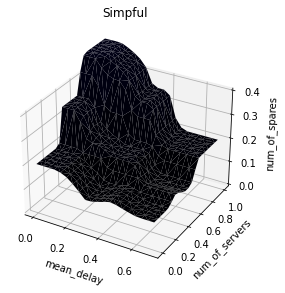

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


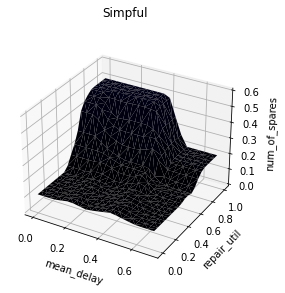

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


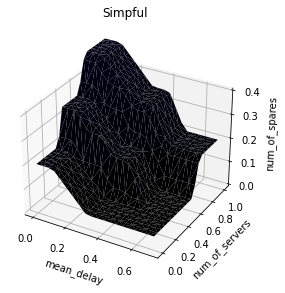

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


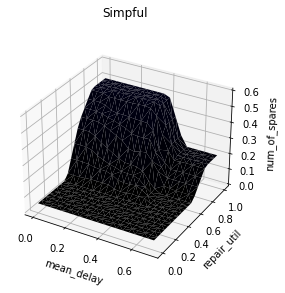

In [16]:
# Plot the response for the rules, surface plot (mamdani)
# TODO add ability to change variable
FS_mamdani_rb2.set_variable("repair_util", 0.6)
surface_plot_3d(FS_mamdani_rb2, ["mean_delay", "num_of_servers", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, .4]],
                divisions=20)
FS_mamdani_rb2.set_variable("num_of_servers", 0.5)
surface_plot_3d(FS_mamdani_rb2, ["mean_delay", "repair_util", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, .6]],
                divisions=20)


# Plot the response for the rules, surface plot (sugeno)
FS_sugeno_rb2.set_variable("repair_util", 0.6)
surface_plot_3d(FS_sugeno_rb2, ["mean_delay", "num_of_servers", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, 0.4]],
                divisions=20, sugeno=True)
FS_sugeno_rb2.set_variable("num_of_servers", 0.5)
surface_plot_3d(FS_sugeno_rb2, ["mean_delay", "repair_util", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, .6]],
                divisions=20, sugeno=True)


In [17]:
# Rule base 3
# Define the rules for db3
# mean_delay: very_short, short, medium
# number_of_servers: small, rather_small, medium, rather_large, large
# utilisation_factor: low, medium, high
# number_of_spares: very_small, small, rather_small, medium, rather_large, large, very_large

R1_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R2_db3 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R3_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R4_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R5_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R6_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_small) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R7_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R8_db3 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R9_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS low) " \
         "THEN (num_of_spares IS very_small)"
R10_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS small)"
R11_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS small)"
R12_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS very_small)"
R13_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS small)"
R14_db3 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS small)"
R15_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS low) " \
          "THEN (num_of_spares IS very_small)"
R16_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R17_db3 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R18_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R19_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R20_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R21_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_small) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R22_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R23_db3 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R24_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS very_small)"
R25_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS medium)"
R26_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R27_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R28_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS medium)"
R29_db3 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS rather_small)"
R30_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS medium) " \
          "THEN (num_of_spares IS small)"
R31_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS very_large)"
R32_db3 = "IF (mean_delay IS short) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS large)"
R33_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R34_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS very_large)"
R35_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_large)"
R36_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_small) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_small)"
R37_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R38_db3 = "IF (mean_delay IS short) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R39_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS medium) AND (repair_util IS high) " \
          "THEN (num_of_spares IS small)"
R40_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS rather_large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_large)"
R41_db3 = "IF (mean_delay IS short) AND (num_of_servers IS rather_large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R42_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS rather_large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_small)"
R43_db3 = "IF (mean_delay IS very_short) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS large)"
R44_db3 = "IF (mean_delay IS short) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS medium)"
R45_db3 = "IF (mean_delay IS medium) AND (num_of_servers IS large) AND (repair_util IS high) " \
          "THEN (num_of_spares IS rather_small)"

rule_base3 = [R1_db3, R2_db3, R3_db3, R4_db3, R5_db3, R6_db3, R7_db3, R8_db3, R9_db3, R10_db3, R11_db3, R12_db3,
              R13_db3, R14_db3, R15_db3, R16_db3, R17_db3, R18_db3, R19_db3, R20_db3, R21_db3, R22_db3, R23_db3,
              R24_db3, R25_db3, R26_db3, R27_db3, R28_db3, R29_db3, R30_db3, R31_db3, R32_db3, R33_db3, R34_db3,
              R35_db3, R36_db3, R37_db3, R38_db3, R39_db3, R40_db3, R41_db3, R42_db3, R43_db3, R44_db3, R45_db3]

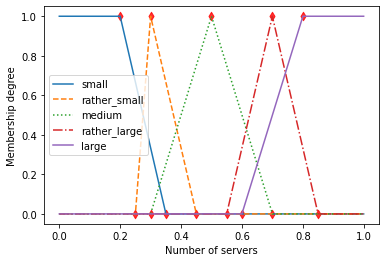

 * Detected Sugeno model type


In [18]:
sys.stdout = open(os.devnull, "w")  # Mute console from this point
FS_mamdani_rb3 = fs.FuzzySystem()
FS_sugeno_rb3 = fs.FuzzySystem()
sys.stdout = old_stdout  # Unmute the console

# Make new linguistic variable for number of servers
num_of_servers_rb3_s1 = fs.FuzzySet(points=[[0.2, 1.], [0.35, 0.]], term="small")
num_of_servers_rb3_s2 = fs.FuzzySet(points=[[0.25, 0.], [0.3, 1.], [0.45, 0.]], term="rather_small")
num_of_servers_rb3_s3 = fs.FuzzySet(points=[[0.3, 0.], [0.5, 1.], [0.7, 0]], term="medium")
num_of_servers_rb3_s4 = fs.FuzzySet(points=[[0.55, 0.], [0.7, 1.], [0.85, 0.]], term="rather_large")
num_of_servers_rb3_s5 = fs.FuzzySet(points=[[0.6, 0.], [0.8, 1.]], term="large")
num_of_servers_rb3 = fs.LinguisticVariable([num_of_servers_rb3_s1, num_of_servers_rb3_s2, num_of_servers_rb3_s3,
                                            num_of_servers_rb3_s4, num_of_servers_rb3_s5],
                                           universe_of_discourse=[0, 1], concept="Number of servers")
# Plot the new linguistic variable
num_of_servers_rb3.plot()

# Add the linguistic variables to the system
FS_mamdani_rb3.add_linguistic_variable("mean_delay", mean_delay)
FS_mamdani_rb3.add_linguistic_variable("num_of_servers", num_of_servers_rb3)
FS_mamdani_rb3.add_linguistic_variable("repair_util", repair_util)
FS_mamdani_rb3.add_linguistic_variable("num_of_spares", num_of_spares)

FS_sugeno_rb3.add_linguistic_variable("mean_delay", mean_delay)
FS_sugeno_rb3.add_linguistic_variable("num_of_servers", num_of_servers_rb3)
FS_sugeno_rb3.add_linguistic_variable("repair_util", repair_util)

# Define output crisp values for the sugeno system
FS_sugeno_rb3.set_crisp_output_value("very_small", 0.05)
FS_sugeno_rb3.set_crisp_output_value("small", 0.2)
FS_sugeno_rb3.set_crisp_output_value("rather_small", 0.35)
FS_sugeno_rb3.set_crisp_output_value("medium", 0.5)
FS_sugeno_rb3.set_crisp_output_value("rather_large", 0.65)
FS_sugeno_rb3.set_crisp_output_value("large", 0.8)
FS_sugeno_rb3.set_crisp_output_value("very_large", 0.95)

# Add the rules to the systems
FS_mamdani_rb3.add_rules(rule_base3)
FS_sugeno_rb3.add_rules(rule_base3)

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


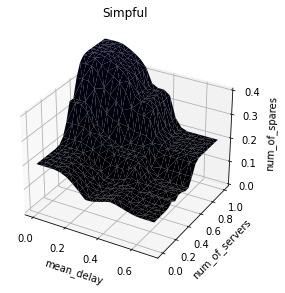

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


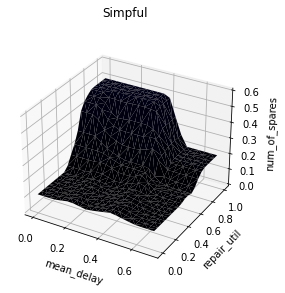

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


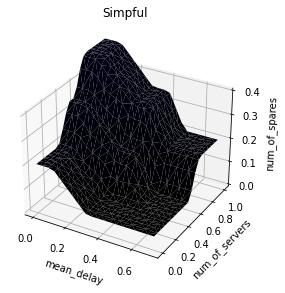

Generating plot |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0% generated


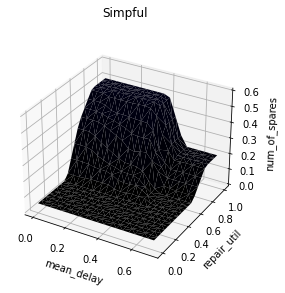

In [20]:
# Plot the response for the rules, surface plot (mamdani)
# TODO add ability to change variable
FS_mamdani_rb3.set_variable("repair_util", 0.6)
surface_plot_3d(FS_mamdani_rb3, ["mean_delay", "num_of_servers", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, 0.4]],
                divisions=20)
FS_mamdani_rb3.set_variable("num_of_servers", 0.5)
surface_plot_3d(FS_mamdani_rb3, ["mean_delay", "repair_util", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, 0.6]],
                divisions=20)


# Plot the response for the rules, surface plot (sugeno)
FS_sugeno_rb3.set_variable("repair_util", 0.6)
surface_plot_3d(FS_sugeno_rb3, ["mean_delay", "num_of_servers", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, 0.4]],
                divisions=20, sugeno=True)
FS_sugeno_rb3.set_variable("num_of_servers", 0.5)
surface_plot_3d(FS_sugeno_rb3, ["mean_delay", "repair_util", "num_of_spares"], domain=[[0, 0.7], [0, 1], [0, 0.6]],
                divisions=20, sugeno=True)


plt.show(block=True)